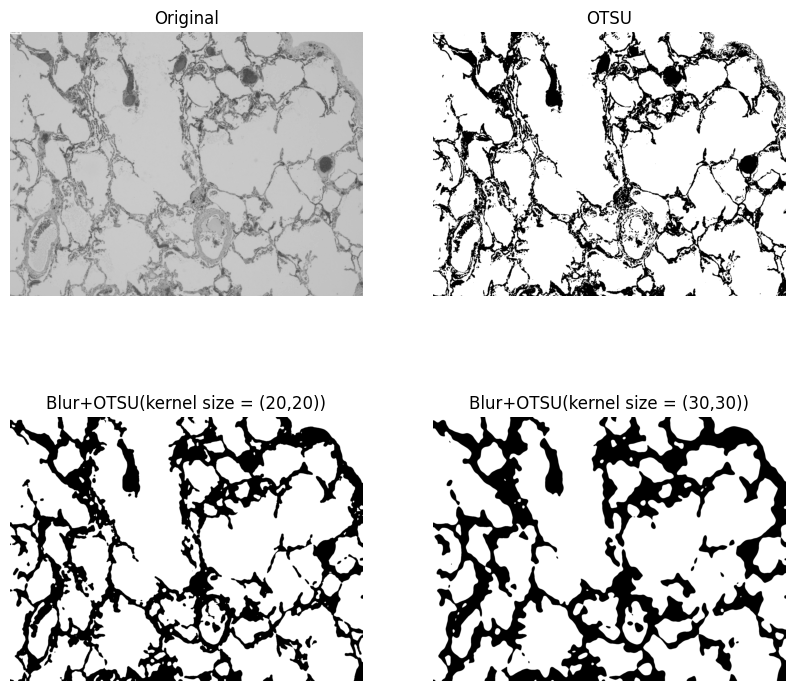

In [1]:
#OTSU进行图像分割
import cv2
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
img = cv2.imread("pic/1.jpg", 0)
ret2, mask_OTSU = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # print("OTSU的shape: ", mask_OTSU.shape)
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0)
plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(img,cmap='gray')
plt.axis("off")
ret2, mask_OTSU = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.subplot(2, 2, 2)
plt.title("OTSU")
plt.imshow(mask_OTSU,cmap='gray')
plt.axis("off")
kernel_size = (20,20)
img = cv2.blur(img, kernel_size)
ret2, mask_OTSU = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.subplot(2, 2, 3)
plt.title("Blur+OTSU(kernel size = (20,20))")
plt.imshow(mask_OTSU,cmap='gray')
plt.axis("off")
kernel_size = (30,30)
img = cv2.blur(img, kernel_size)
ret2, mask_OTSU = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.subplot(2, 2, 4)
plt.title("Blur+OTSU(kernel size = (30,30))")
plt.imshow(mask_OTSU,cmap='gray')
plt.axis("off")
plt.show()

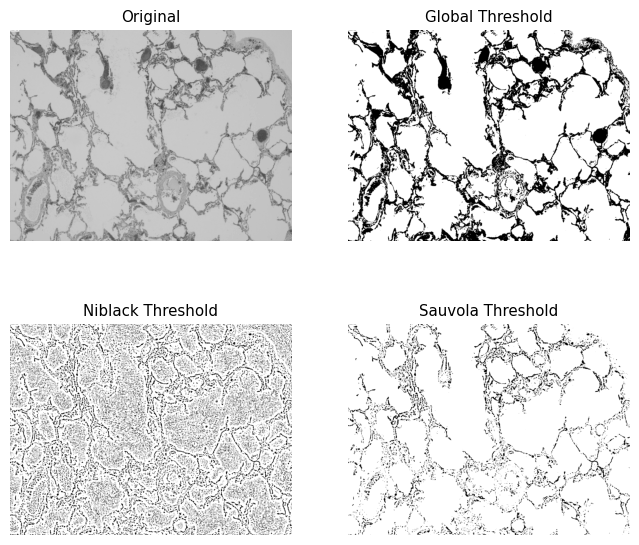

In [2]:
#Global Threshold、Niblack Threshold、Sauvola Threshold进行图像分割
import matplotlib
import matplotlib.pyplot as plt
from skimage.filters import (threshold_otsu, threshold_niblack,threshold_sauvola)
matplotlib.rcParams['font.size'] = 9
image = cv2.imread("pic/1.jpg", 0)
binary_global = image > threshold_otsu(image)
window_size = 25
thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8)
thresh_sauvola = threshold_sauvola(image, window_size=window_size)
binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola
plt.figure(figsize=(8, 7))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title('Global Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')
plt.show()

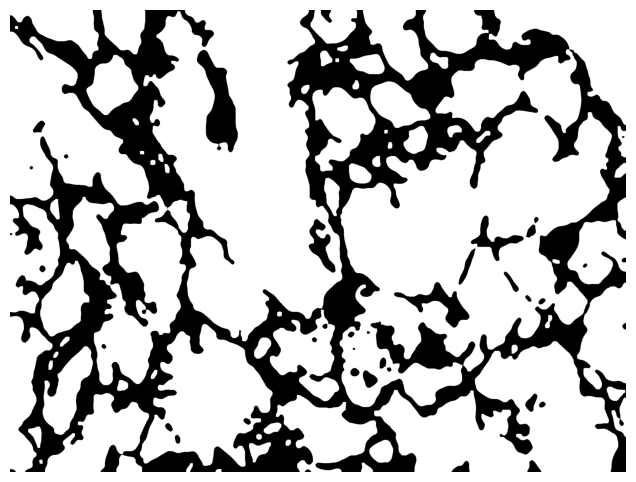

In [6]:
#效果最好 多次OTSU+blur+MORPH_OPEN
img = cv2.imread("pic/1.jpg", 0)
ret2, mask_OTSU = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel_size = (20,20) #可调参
img = cv2.blur(mask_OTSU, kernel_size)
ret2, mask_OTSU = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
img = cv2.blur(mask_OTSU, kernel_size)
ret2, mask_OTSU = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#设置卷积核
kernel = np.ones((10,10), np.uint8) #可调参
dst = cv2.morphologyEx(mask_OTSU, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(8, 6))
plt.imshow(dst,cmap='gray')
plt.axis("off")
plt.show()